<a href="https://colab.research.google.com/github/asiftandel96/DS-Use-Cases/blob/main/Climate_Change_by_City_Use_Cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading the necessary Libraries in the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
# Loading the data
df=pd.read_csv('/content/sample_data/GlobalLandTemperaturesByMajorCity.csv')

In [3]:
# Loading the first five rows of the dataset
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [4]:
# Checking the missing values of the dataset
df.isnull().mean()

dt                               0.000000
AverageTemperature               0.045999
AverageTemperatureUncertainty    0.045999
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [5]:
# Checking the dtypes of the dataset
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [6]:
# Describing the data
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [7]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [8]:
# Checking the shape of the dataset
df.shape

(239177, 7)

In [9]:
# Rename columns of the DataFrame
df.rename(columns={'AverageTemperature':'Temperature','AverageTemperatureUncertainty':'DeviationInTemperature'},inplace=True)

In [10]:
df.head()

,dt,Temperature,DeviationInTemperature,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [11]:
#Note:It is important that we keep our dataset as it is and copy content of it in another dataset
df1=df.copy()

In [12]:
# Changing dtypes of some features like datetime like dt and other as we go ahead in our analysis
df1['dt']=pd.to_datetime(df1['dt'])

In [13]:
# Checking the datatypes of dt feature(is it properly transformed or not)
df1['dt'].dtypes

dtype('<M8[ns]')

In [14]:
df1.dtypes

dt                        datetime64[ns]
Temperature                      float64
DeviationInTemperature           float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [15]:
df1['dt'].tail()

239172   2013-05-01
239173   2013-06-01
239174   2013-07-01
239175   2013-08-01
239176   2013-09-01
Name: dt, dtype: datetime64[ns]

In [16]:
# Extracting Year from the dt columns
df1['year']=df1['dt'].dt.year

In [17]:
# Extracting quarter from the dt columns
df1['quarter']=df1['dt'].dt.quarter

In [18]:
# Extracting month from the dt columns
df1['month']=df1['dt'].dt.month

In [19]:
df1.head(1)

,dt,Temperature,DeviationInTemperature,City,Country,Latitude,Longitude,year,quarter,month
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1


In [20]:
df1.dropna(inplace=True)

In [21]:
df1.shape

(228175, 10)

In [22]:
# Checking the counts of the City
df1[['Country','City']].value_counts().head(10).sort_values(ascending=False)

Country         City            
Germany         Berlin              3166
France          Paris               3166
Italy           Rome                3166
Russia          Saint Petersburg    3166
Turkey          Istanbul            3166
Ukraine         Kiev                3166
United Kingdom  London              3166
Russia          Moscow              3166
Spain           Madrid              3166
Canada          Toronto             3141
dtype: int64

In [24]:
df1[['Country','City','Latitude','Longitude']].head()

,Country,City,Latitude,Longitude
0,Côte D'Ivoire,Abidjan,5.63N,3.23W
1,Côte D'Ivoire,Abidjan,5.63N,3.23W
2,Côte D'Ivoire,Abidjan,5.63N,3.23W
3,Côte D'Ivoire,Abidjan,5.63N,3.23W
4,Côte D'Ivoire,Abidjan,5.63N,3.23W


In [25]:
df1['Latitude'].unique()

array(['5.63N', '8.84N', '23.31N', '36.17N', '31.35N', '39.38N', '32.95N',
       '12.05N', '13.66N', '20.09S', '52.24N', '4.02N', '18.48N',
       '15.27S', '29.74N', '32.95S', '44.20N', '42.59N', '15.27N',
       '7.23S', '28.13N', '29.74S', '4.02S', '18.48S', '45.81N', '10.45N',
       '16.87N', '7.23N', '40.99N', '37.78N', '26.52N', '5.63S', '21.70N',
       '34.56N', '24.92N', '50.63N', '12.05S', '8.84S', '37.78S',
       '20.09N', '2.41N', '55.45N', '0.80S', '49.03N', '23.31S', '60.27N',
       '13.66S', '0.80N', '34.56S'], dtype=object)

In [26]:
df1['Longitude'].unique()

array(['3.23W', '38.11E', '72.52E', '37.79E', '30.16E', '33.29E',
       '45.00E', '77.26E', '99.91E', '44.36W', '13.14E', '74.73W',
       '72.68E', '47.50W', '31.38E', '88.25E', '76.34W', '18.19E',
       '6.70W', '125.22E', '103.66E', '87.27W', '107.08E', '17.50W',
       '120.69E', '39.73E', '77.27E', '90.00E', '73.51E', '40.98W',
       '112.72E', '30.42E', '125.77E', '107.18E', '78.70E', '4.05E',
       '29.82E', '26.44E', '75.22E', '106.55E', '38.94E', '117.35E',
       '70.05E', '8.22E', '80.60E', '67.39E', '31.69E', '15.27E', '3.23E',
       '77.26W', '0.00W', '118.70W', '13.78E', '80.09E', '4.26W',
       '120.83E', '59.67E', '144.41E', '98.96W', '45.80E', '72.69W',
       '36.85E', '136.22E', '78.75E', '36.16E', '118.74E', '74.56W',
       '2.45E', '116.53E', '74.37E', '95.44E', '42.82W', '46.11E',
       '13.09E', '46.31W', '29.19E', '38.81W', '69.89W', '69.30W',
       '126.10E', '120.63E', '123.55E', '112.70E', '73.56E', '151.78E',
       '122.36E', '111.86E', '113.90E', 

In [ ]:
# Handle Features Like Latitude and Longitude
!pip install geopandas

In [27]:
df1.head()

,dt,Temperature,DeviationInTemperature,City,Country,Latitude,Longitude,year,quarter,month
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,2
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,3
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,4
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,5


In [28]:
df1[['Country','Temperature','DeviationInTemperature','Latitude','Longitude']].head()

,Country,Temperature,DeviationInTemperature,Latitude,Longitude
0,Côte D'Ivoire,26.704,1.435,5.63N,3.23W
1,Côte D'Ivoire,27.434,1.362,5.63N,3.23W
2,Côte D'Ivoire,28.101,1.612,5.63N,3.23W
3,Côte D'Ivoire,26.140,1.387,5.63N,3.23W
4,Côte D'Ivoire,25.427,1.200,5.63N,3.23W


In [29]:
df1.describe(include=['O'])

,City,Country,Latitude,Longitude
count,228175,228175,228175,228175
unique,100,49,49,93
top,Moscow,China,31.35N,31.38E
freq,3166,34952,13159,6757


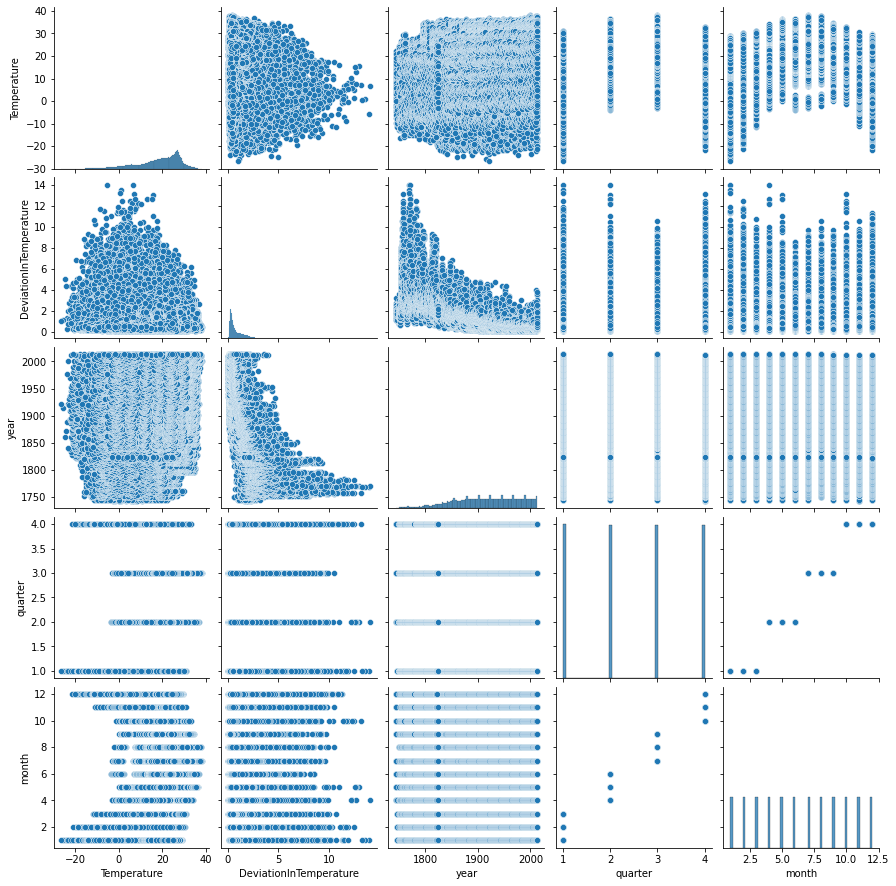

In [32]:
# Basic Data Exploration Of the Dataset using Some Visualization,pivot tables.
sns.pairplot(df1)

All the Features such as Temperature,
deviation are Skewed Distribution may be because of Outliers
in the dataset or Temperature and deviationInTemperature in  
every country/City is different from each other that may 
be a possibility.We will check in the analysis of Further
Exploration

In [33]:
#Exploratory Data Analysis
# Checking the columns of the dataset
df1.columns

Index(['dt', 'Temperature', 'DeviationInTemperature', 'City', 'Country',
       'Latitude', 'Longitude', 'year', 'quarter', 'month'],
      dtype='object')

In [34]:
df1.groupby('City')['Temperature'].agg('min').sort_values().head(10)

City
Harbin             -26.772
Changchun          -23.272
Moscow             -19.376
Saint Petersburg   -18.644
Montreal           -18.363
Shenyang           -17.035
Kiev               -16.191
Toronto            -15.502
Taiyuan            -13.116
Berlin             -10.125
Name: Temperature, dtype: float64

In [35]:
df1.groupby('City')['DeviationInTemperature'].agg('min').sort_values().head()

City
Belo Horizonte    0.040
Tokyo             0.049
Calcutta          0.056
Changchun         0.056
Moscow            0.060
Name: DeviationInTemperature, dtype: float64

In [36]:
df1.groupby(['Country','City','Latitude','Longitude'])['Temperature'].agg('min').sort_values().head(10)

Country  City              Latitude  Longitude
China    Harbin            45.81N    125.77E     -26.772
         Changchun         44.20N    125.22E     -23.272
Russia   Moscow            55.45N    36.85E      -19.376
         Saint Petersburg  60.27N    29.19E      -18.644
Canada   Montreal          45.81N    72.69W      -18.363
China    Shenyang          40.99N    123.55E     -17.035
Ukraine  Kiev              50.63N    31.69E      -16.191
Canada   Toronto           44.20N    80.50W      -15.502
China    Taiyuan           37.78N    111.86E     -13.116
Germany  Berlin            52.24N    13.14E      -10.125
Name: Temperature, dtype: float64

In [37]:
df1.groupby(['Country','City','Latitude','Longitude'])['Temperature'].agg('max').sort_values().head(10)

Country         City              Latitude  Longitude
Chile           Santiago          32.95S    69.89W       13.918
Kenya           Nairobi           0.80S     36.16E       19.446
United Kingdom  London            52.24N    0.00W        20.743
Mexico          Mexico            20.09N    98.96W       21.000
Ethiopia        Addis Abeba       8.84N     38.11E       21.223
China           Chengdu           31.35N    103.66E      21.839
Russia          Saint Petersburg  60.27N    29.19E       21.921
Australia       Sydney            34.56S    151.78E      22.042
South Africa    Cape Town         32.95S    18.19E       22.084
Colombia        Bogotá            4.02N     74.73W       22.508
Name: Temperature, dtype: float64

In [38]:
df1.groupby(['Country','City','Latitude','Longitude'])['DeviationInTemperature'].agg('min').sort_values().head(10)

Country         City            Latitude  Longitude
Brazil          Belo Horizonte  20.09S    44.36W       0.040
Japan           Tokyo           36.17N    139.23E      0.049
China           Changchun       44.20N    125.22E      0.056
India           Calcutta        23.31N    88.25E       0.056
Japan           Nagoya          34.56N    136.22E      0.060
United Kingdom  London          52.24N    0.00W        0.060
Russia          Moscow          55.45N    36.85E       0.060
Turkey          Izmir           37.78N    26.44E       0.062
Germany         Berlin          52.24N    13.14E       0.065
Canada          Montreal        45.81N    72.69W       0.065
Name: DeviationInTemperature, dtype: float64

In [39]:
# Slicing some of the data of Latitude
df1['Latitude'][0][4:]

'N'

In [40]:
# Slicing some of the data of Longitude
df1['Longitude'][0][4:]

'W'

In [41]:
pd.pivot_table(data=df1,index=['City','Latitude','Longitude'],aggfunc='max').sort_values('DeviationInTemperature',ascending=False).head(20)

,,,Country,DeviationInTemperature,Temperature,dt,month,quarter,year
City,Latitude,Longitude,,,,,,,
Berlin,52.24N,13.14E,Germany,14.037,23.795,2013-08-01,12,4,2013
London,52.24N,0.00W,United Kingdom,13.560,20.743,2013-08-01,12,4,2013
Paris,49.03N,2.45E,France,13.224,23.264,2013-08-01,12,4,2013
Rome,42.59N,13.09E,Italy,12.166,25.951,2013-08-01,12,4,2013
Saint Petersburg,60.27N,29.19E,Russia,11.685,21.921,2013-08-01,12,4,2013
New York,40.99N,74.56W,United States,10.193,29.141,2013-09-01,12,4,2013
Madrid,40.99N,4.26W,Spain,9.770,24.771,2013-08-01,12,4,2013
Kiev,50.63N,31.69E,Ukraine,9.514,24.593,2013-08-01,12,4,2013
Montreal,45.81N,72.69W,Canada,9.304,26.164,2013-09-01,12,4,2013


In [42]:
pd.pivot_table(data=df1,index=['City','Latitude','Longitude'],aggfunc='min').sort_values('DeviationInTemperature',ascending=True).head(20)

,,,Country,DeviationInTemperature,Temperature,dt,month,quarter,year
City,Latitude,Longitude,,,,,,,
Belo Horizonte,20.09S,44.36W,Brazil,0.040,15.920,1832-01-01,1,1,1832
Tokyo,36.17N,139.23E,Japan,0.049,-1.580,1845-01-01,1,1,1845
Calcutta,23.31N,88.25E,India,0.056,15.253,1796-01-01,1,1,1796
Changchun,44.20N,125.22E,China,0.056,-23.272,1820-08-01,1,1,1820
Moscow,55.45N,36.85E,Russia,0.060,-19.376,1743-11-01,1,1,1743
Nagoya,34.56N,136.22E,Japan,0.060,1.423,1841-04-01,1,1,1841
London,52.24N,0.00W,United Kingdom,0.060,-2.781,1743-11-01,1,1,1743
Izmir,37.78N,26.44E,Turkey,0.062,5.607,1753-01-01,1,1,1753
Montreal,45.81N,72.69W,Canada,0.065,-18.363,1743-11-01,1,1,1743


In [43]:
pd.pivot_table(data=df1,index=['Country'],aggfunc='max').sort_values('Temperature',ascending=False).head()

,City,DeviationInTemperature,Latitude,Longitude,Temperature,dt,month,quarter,year
Country,,,,,,,,,
Iraq,Baghdad,4.752,32.95N,45.00E,38.283,2013-08-01,12,4,2013
Saudi Arabia,Riyadh,4.399,24.92N,46.11E,37.859,2013-08-01,12,4,2013
India,Surat,7.781,28.13N,88.25E,36.477,2013-08-01,12,4,2013
Pakistan,Lahore,4.973,31.35N,73.51E,36.346,2013-08-01,12,4,2013
Sudan,Umm Durman,4.663,15.27N,32.50E,35.700,2013-08-01,12,4,2013


In [44]:
pd.pivot_table(data=df1,index=['Country'],aggfunc='max').sort_values('DeviationInTemperature',ascending=False).head()

,City,DeviationInTemperature,Latitude,Longitude,Temperature,dt,month,quarter,year
Country,,,,,,,,,
Germany,Berlin,14.037,52.24N,13.14E,23.795,2013-08-01,12,4,2013
United Kingdom,London,13.560,52.24N,0.00W,20.743,2013-08-01,12,4,2013
France,Paris,13.224,49.03N,2.45E,23.264,2013-08-01,12,4,2013
Italy,Rome,12.166,42.59N,13.09E,25.951,2013-08-01,12,4,2013
Russia,Saint Petersburg,11.685,60.27N,36.85E,24.580,2013-08-01,12,4,2013


In [45]:
pd.pivot_table(data=df1,index=['Country'],aggfunc='min').sort_values('DeviationInTemperature').head()

,City,DeviationInTemperature,Latitude,Longitude,Temperature,dt,month,quarter,year
Country,,,,,,,,,
Brazil,Belo Horizonte,0.040,13.66S,38.81W,13.536,1832-01-01,1,1,1832
Japan,Nagoya,0.049,34.56N,136.22E,-1.580,1841-04-01,1,1,1841
India,Ahmadabad,0.056,12.05N,72.52E,11.378,1796-01-01,1,1,1796
China,Changchun,0.056,23.31N,103.66E,-26.772,1820-08-01,1,1,1820
United Kingdom,London,0.060,52.24N,0.00W,-2.781,1743-11-01,1,1,1743


In [46]:
df1.corr()

,Temperature,DeviationInTemperature,year,quarter,month
Temperature,1.000000,-0.199380,0.146691,0.105495,0.102462
DeviationInTemperature,-0.199380,1.000000,-0.748272,-0.039238,-0.039538
year,0.146691,-0.748272,1.000000,-0.003906,-0.004004
quarter,0.105495,-0.039238,-0.003906,1.000000,0.971616
month,0.102462,-0.039538,-0.004004,0.971616,1.000000


In [47]:
# Handling Categorical Variables using techniques like One-Hot Encoding,Label Encoding and more
df1.isnull().sum()

dt                        0
Temperature               0
DeviationInTemperature    0
City                      0
Country                   0
Latitude                  0
Longitude                 0
year                      0
quarter                   0
month                     0
dtype: int64

In [97]:
country_encoded=pd.get_dummies(df1['Country'],drop_first=True)

In [98]:
country_encoded.head()

,Angola,Australia,Bangladesh,Brazil,Burma,Canada,Chile,China,Colombia,Congo (Democratic Republic Of The),Côte D'Ivoire,Dominican Republic,Egypt,Ethiopia,France,Germany,India,Indonesia,Iran,Iraq,Italy,Japan,Kenya,Mexico,Morocco,Nigeria,Pakistan,Peru,Philippines,Russia,Saudi Arabia,Senegal,Singapore,Somalia,South Africa,South Korea,Spain,Sudan,Syria,Taiwan,Tanzania,Thailand,Turkey,Ukraine,United Kingdom,United States,Vietnam,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
len(df1['City'].unique())

100

In [100]:
city_encoded=pd.get_dummies(df1['City'],drop_first=True)

In [101]:
city_encoded

,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,Belo Horizonte,Berlin,Bogotá,Bombay,Brasília,Cairo,Calcutta,Cali,Cape Town,Casablanca,Changchun,Chengdu,Chicago,Chongqing,Dakar,Dalian,Dar Es Salaam,Delhi,Dhaka,Durban,Faisalabad,Fortaleza,Gizeh,Guangzhou,Harare,Harbin,Ho Chi Minh City,Hyderabad,Ibadan,Istanbul,Izmir,Jaipur,...,Mashhad,Melbourne,Mexico,Mogadishu,Montreal,Moscow,Nagoya,Nagpur,Nairobi,Nanjing,New Delhi,New York,Paris,Peking,Pune,Rangoon,Rio De Janeiro,Riyadh,Rome,Saint Petersburg,Salvador,Santiago,Santo Domingo,Seoul,Shanghai,Shenyang,Singapore,Surabaya,Surat,Sydney,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
239172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
239173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
239174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [102]:
df2=pd.concat([df1,country_encoded,city_encoded],axis=1)

In [103]:
df2.shape

(228175, 157)

In [104]:
df2.head()

,dt,Temperature,DeviationInTemperature,City,Country,Latitude,Longitude,year,quarter,month,Angola,Australia,Bangladesh,Brazil,Burma,Canada,Chile,China,Colombia,Congo (Democratic Republic Of The),Côte D'Ivoire,Dominican Republic,Egypt,Ethiopia,France,Germany,India,Indonesia,Iran,Iraq,Italy,Japan,Kenya,Mexico,Morocco,Nigeria,Pakistan,Peru,Philippines,Russia,...,Mashhad,Melbourne,Mexico,Mogadishu,Montreal,Moscow,Nagoya,Nagpur,Nairobi,Nanjing,New Delhi,New York,Paris,Peking,Pune,Rangoon,Rio De Janeiro,Riyadh,Rome,Saint Petersburg,Salvador,Santiago,Santo Domingo,Seoul,Shanghai,Shenyang,Singapore,Surabaya,Surat,Sydney,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
len(df1['Latitude'].unique())

49

In [75]:
len(df1['Longitude'].unique())

93

In [105]:
Latitude_encoded=pd.get_dummies(df1['Latitude'],drop_first=True)

In [106]:
Latitude_encoded

,0.80S,10.45N,12.05N,12.05S,13.66N,13.66S,15.27N,15.27S,16.87N,18.48N,18.48S,2.41N,20.09N,20.09S,21.70N,23.31N,23.31S,24.92N,26.52N,28.13N,29.74N,29.74S,31.35N,32.95N,32.95S,34.56N,34.56S,36.17N,37.78N,37.78S,39.38N,4.02N,4.02S,40.99N,42.59N,44.20N,45.81N,49.03N,5.63N,5.63S,50.63N,52.24N,55.45N,60.27N,7.23N,7.23S,8.84N,8.84S
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
239172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
239173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
239174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
Longitude_encoded=pd.get_dummies(df1['Longitude'],drop_first=True)

In [108]:
Longitude_encoded.head()

,103.66E,106.55E,107.08E,107.18E,108.97E,111.86E,112.70E,112.72E,113.90E,114.46E,116.53E,117.35E,118.70W,118.74E,120.63E,120.69E,120.83E,122.36E,123.55E,125.22E,125.77E,126.10E,13.09E,13.14E,13.78E,136.22E,139.23E,144.41E,15.27E,151.78E,17.50W,18.19E,2.45E,26.44E,29.19E,29.82E,3.23E,3.23W,30.16E,30.42E,...,4.26W,40.98W,42.82W,44.36W,45.00E,45.80E,46.11E,46.31W,47.50W,59.67E,6.70W,67.39E,69.30W,69.89W,70.05E,72.52E,72.68E,72.69W,73.51E,73.56E,74.37E,74.56W,74.73W,75.22E,76.34W,77.26E,77.26W,77.27E,78.70E,78.75E,8.22E,80.09E,80.50W,80.60E,87.27W,88.25E,90.00E,95.44E,98.96W,99.91E
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
df3=pd.concat([df2,Latitude_encoded,Longitude_encoded],axis=1)

In [110]:
df3.shape

(228175, 297)

In [111]:
df3.isnull().sum()

dt                        0
Temperature               0
DeviationInTemperature    0
City                      0
Country                   0
                         ..
88.25E                    0
90.00E                    0
95.44E                    0
98.96W                    0
99.91E                    0
Length: 297, dtype: int64

In [112]:
df3.shape

(228175, 297)

In [113]:
df4=df3.copy()

In [114]:
X=df4.drop(['dt','City','Country','Latitude','Temperature','Longitude','month'],axis=1)
y=df4.Temperature.values

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [131]:
from sklearn.linear_model import LinearRegression
model_lm=LinearRegression()
model_lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
y_pred=model_lm.predict(X_test)

In [133]:
from sklearn.metrics import r2_score,mean_squared_error
print('the training accuracy is:',r2_score(y_train,model_lm.predict(X_train)))
print('the testing accuracy is:',r2_score(y_pred,y_test))
print('The mean squared error is:',mean_squared_error(y_test,y_pred))
print('The mean absolute error is:',mean_absolute_error(y_test,y_pred))

the training accuracy is: 0.5774848549833087
the testing accuracy is: 0.26442480960871373
The mean squared error is: 42.52989780502712
The mean absolute error is: 4.9812305177067815


In [134]:
from sklearn.neighbors import KNeighborsRegressor
model_knn=KNeighborsRegressor()
model_knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [135]:
y_pred_knn=model_knn.predict(X_test)

In [136]:
from sklearn.metrics import mean_absolute_error
print('the training accuracy is:',r2_score(y_train,model_knn.predict(X_train)))
print('the testing accuracy is:',r2_score(y_pred_knn,y_test))
print('The mean squared error is:',mean_squared_error(y_test,y_pred_knn))
print('The mean absolute error is:',mean_absolute_error(y_test,y_pred_knn))

the training accuracy is: 0.8628119548853038
the testing accuracy is: 0.695427855869968
The mean squared error is: 21.428593554950115
The mean absolute error is: 3.2425237199246197


In [138]:
# Creating K Folds
from sklearn.model_selection import KFold
seed=13
kfold=KFold(n_splits=3,shuffle=True,random_state=seed)

In [139]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

In [ ]:
# Search for best hyperparameters
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model_knn, param_grid=hp_candidates, cv=kfold, scoring='r2',n_jobs=3)
grid.fit(X, y)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor()
model_dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred_dt=model_dt.predict(X_test)

In [ ]:
print('the training accuracy is:',r2_score(y_train,model_dt.predict(X_train)))
print('the testing accuracy is:',r2_score(y_pred_dt,y_test))
print('The mean squared error is:',mean_squared_error(y_test,y_pred_dt))
print('The mean absolute error is:',mean_absolute_error(y_test,y_pred_dt))

the training accuracy is: 1.0
the testing accuracy is: 0.9782613412337698
The mean squared error is: 2.190993080289252
The mean absolute error is: 0.9671549687739673


In [ ]:
from sklearn.ensemble import RandomForestRegressor
#model_rf=RandomForestRegressor(ccp_alpha=0.2)
#model_rf.fit(X_train,y_train)

In [ ]:
#y_pred_rf=model_rf.predict(X_test)

In [ ]:
#print('the training accuracy is:',r2_score(y_train,model_rf.predict(X_train)))
#print('the testing accuracy is:',r2_score(y_pred_rf,y_test))
#print('The mean squared error is:',mean_squared_error(y_test,y_pred_rf))
#print('The mean absolute error is:',mean_absolute_error(y_test,y_pred_rf))

the training accuracy is: 0.9981306863655047
the testing accuracy is: 0.9863494586334722
The mean squared error is: 1.3609086599910993
The mean absolute error is: 0.7856511372606308
